### Empresas: **Tesla** y **GameStop**

**Objetivo**:
- Extracción de datos de beneficios (*earnings data*)
- Construir un dashboard y comparar el precio de las acciones frente a los beneficios,  para ayudar a decidir en qué acciones invertir, basándose en datos reales


### ¿Qué son los datos de beneficio?

Los **datos de beneficio** muestran cuánto gana una empresa.  
Se publican en reportes trimestrales y son clave para entender si una compañía está teniendo buenos resultados financieros.

#### Principales elementos:

- **Ingresos (Revenue)**: Total de dinero que entra por ventas.
- **Beneficio neto (Net Income)**: Ganancia final luego de restar todos los gastos.
- **EPS (Earnings Per Share)**: Beneficio por acción; cuánto gana la empresa por cada acción en circulación.

#### ¿Por qué son importantes?

Permiten analizar si el **precio de una acción refleja realmente las ganancias de la empresa**.

> Si una acción es cara pero la empresa gana poco, puede estar sobrevalorada.  
> Si una acción es barata pero la empresa gana mucho, puede ser una oportunidad de inversión.


In [1]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly
!pip install yfinance
!pip install dash
!pip install nbformat 


  Using cached dash-3.1.1-py3-none-any.whl.metadata (10 kB)
  Using cached retrying-1.4.0-py3-none-any.whl.metadata (7.5 kB)
Using cached dash-3.1.1-py3-none-any.whl (7.9 MB)
Using cached retrying-1.4.0-py3-none-any.whl (11 kB)


In [2]:
import os
path = r'C:\PROYECTOS\GitHub\Earnings Data'
os.chdir(path)
os.getcwd()

'C:\\PROYECTOS\\GitHub\\Earnings Data'

In [3]:
import warnings
# ignorar todas la advertencias
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px 
import dash
from dash import dcc, html

In [5]:
tesla = yf.Ticker("TSLA")
gamestop = yf.Ticker("GME")

In [7]:
data_tesla = tesla.history(period="3mo")
data_tesla.reset_index(inplace=True)
data_gamestop = gamestop.history(period="3mo")
data_gamestop.reset_index(inplace=True)

In [8]:
print(data_tesla.head())
print(data_gamestop.head())

                       Date        Open        High         Low       Close  \
0 2025-04-17 00:00:00-04:00  243.470001  244.339996  237.679993  241.369995   
1 2025-04-21 00:00:00-04:00  230.259995  232.210007  222.789993  227.500000   
2 2025-04-22 00:00:00-04:00  230.960007  242.789993  229.850006  237.970001   
3 2025-04-23 00:00:00-04:00  254.860001  259.450012  244.429993  250.740005   
4 2025-04-24 00:00:00-04:00  250.500000  259.540009  249.199997  259.510010   

      Volume  Dividends  Stock Splits  
0   83404800        0.0           0.0  
1   97768000        0.0           0.0  
2  120858500        0.0           0.0  
3  150381900        0.0           0.0  
4   94464200        0.0           0.0  
                       Date       Open       High        Low      Close  \
0 2025-04-17 00:00:00-04:00  26.209999  27.190001  26.170000  26.780001   
1 2025-04-21 00:00:00-04:00  26.709999  27.040001  25.790001  26.770000   
2 2025-04-22 00:00:00-04:00  26.990000  27.940001  26.879999

In [9]:
# verificar si los datos incluyen el EPS (earnings per share)   

print(f"EPS Tesla: {tesla.info["trailingEps"]}")
print(f"EPS GameStop: {gamestop.info["trailingEps"]}")

EPS Tesla: 1.74
EPS GameStop: 0.53


In [10]:
eps_tesla = tesla.info["trailingEps"]
eps_gamestop = gamestop.info["trailingEps"]

In [9]:
print(data_tesla.tail())
print(data_gamestop.tail())

                        Date        Open        High         Low       Close  \
57 2025-06-27 00:00:00-04:00  324.510010  329.339996  317.500000  323.630005   
58 2025-06-30 00:00:00-04:00  319.899994  325.579987  316.600006  317.660004   
59 2025-07-01 00:00:00-04:00  298.459991  305.890015  293.209991  300.709991   
60 2025-07-02 00:00:00-04:00  312.630005  316.829987  303.820007  315.649994   
61 2025-07-03 00:00:00-04:00  317.989990  318.450012  312.760010  315.350006   

       Volume  Dividends  Stock Splits  
57   89067000        0.0           0.0  
58   76695100        0.0           0.0  
59  145085700        0.0           0.0  
60  119191500        0.0           0.0  
61   58042300        0.0           0.0  
                        Date       Open   High        Low      Close  \
57 2025-06-27 00:00:00-04:00  23.990000  24.26  23.459999  23.590000   
58 2025-06-30 00:00:00-04:00  23.639999  24.40  23.540001  24.389999   
59 2025-07-01 00:00:00-04:00  24.150000  24.50  23.680000

In [12]:
# obtener el precio más reciente de las acciones de Tesla y GameStop:

precio_actual_tesla = data_tesla["Close"].iloc[-1] # último valor de la columna "Close"
precio_actual_gamestop = data_gamestop["Close"].iloc[-1] # último valor de la columna "Close"

In [13]:
print(precio_actual_tesla)
print(precio_actual_gamestop)

318.8900146484375
23.58989906311035


**P/E ratio** (Price-to-Earnings ratio) es el indicador que compara el **precio de una acción** con su **beneficio por acción** (EPS).  
Se calcula así:

**P/E = Precio actual de la acción / EPS**


In [14]:
pe_ratio_tesla = precio_actual_tesla / eps_tesla
pe_ratio_gamestop = precio_actual_gamestop / eps_gamestop
print("P/E ratio Tesla:", pe_ratio_tesla)
print("P/E ratio GameStop:",pe_ratio_gamestop)

P/E ratio Tesla: 183.270123361171
P/E ratio GameStop: 44.50924351530255


In [15]:
# Se crea un diccionario con los datos

datos_empresas = {
    "Empresa": ["Tesla", "GameStop"],
    "Precio actual": [precio_actual_tesla, precio_actual_gamestop],
    "EPS": [eps_tesla, eps_gamestop],
    "P/E ratio": [pe_ratio_tesla,pe_ratio_gamestop]
}

# Se convierte el diccionario en un DataFrame

tabla_resumen = pd.DataFrame(datos_empresas)

print(tabla_resumen)

    Empresa  Precio actual   EPS   P/E ratio
0     Tesla     318.890015  1.74  183.270123
1  GameStop      23.589899  0.53   44.509244


# Precio Actual

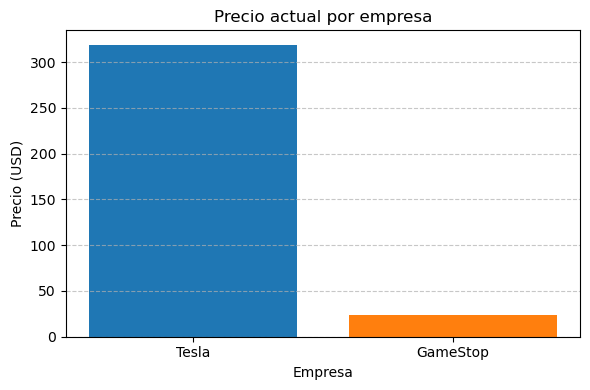

In [35]:
import matplotlib.pyplot as plt

empresas = tabla_resumen["Empresa"]
precios = tabla_resumen["Precio actual"]

plt.figure(figsize=(6,4))
plt.bar(empresas, precios, color=["#1f77b4", "#ff7f0e"])
plt.title("Precio actual por empresa")
plt.ylabel("Precio (USD)")
plt.xlabel("Empresa")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [40]:
# utilizando plotly.express.bar
import plotly.express as px

fig = px.bar(tabla_resumen, 
             x="Empresa", 
             y="Precio actual",
             title="Precio actual por empresa",
             labels={"Precio actual": "Precio (USD)"},
             text=tabla_resumen["Precio actual"].round(2),
             color="Empresa",  # para usar colores distintos
             color_discrete_sequence=["#3366CC", "#FF9900"])  # colores suaves

fig.update_traces(
    texttemplate='$%{text:.2f}', 
    textposition='outside',
    marker_line_width=1.5,
    marker_line_color='black'
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=14),
    yaxis=dict(gridcolor='lightgrey', title='Precio (USD)'),
    xaxis=dict(title='Empresa'),
    title=dict(x=0.5, font=dict(size=18))
)

fig.show()


# Gráfico de EPS

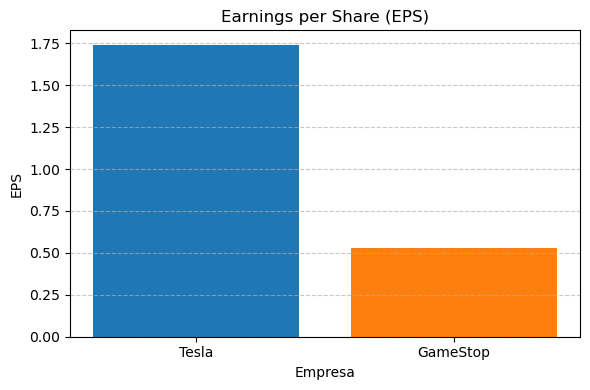

In [36]:
eps = tabla_resumen["EPS"]

plt.figure(figsize=(6,4))
plt.bar(empresas, eps, color=["#1f77b4", "#ff7f0e"])
plt.title("Earnings per Share (EPS)")
plt.ylabel("EPS")
plt.xlabel("Empresa")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [41]:
# utilizando plotly.express.bar
fig = px.bar(tabla_resumen, 
             x="Empresa", 
             y="EPS",
             title="Earnings per Share (EPS)",
             labels={"EPS": "EPS"},
             text=tabla_resumen["EPS"].round(2),
             color="Empresa",
             color_discrete_sequence=["#3366CC", "#FF9900"])

fig.update_traces(
    texttemplate='%{text:.2f}', 
    textposition='outside',
    marker_line_width=1.5,
    marker_line_color='black'
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=14),
    yaxis=dict(gridcolor='lightgrey', title='EPS'),
    xaxis=dict(title='Empresa'),
    title=dict(x=0.5, font=dict(size=18))
)

fig.show()


# Gráfico de P/E ratio

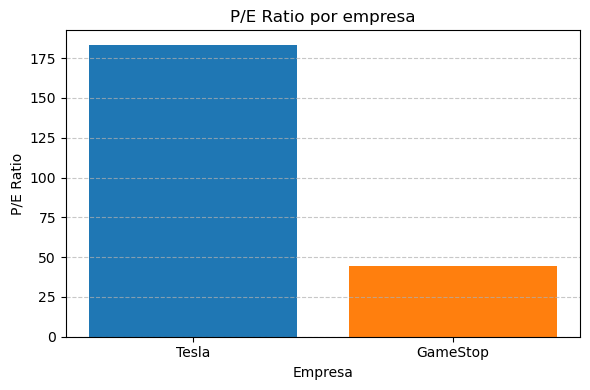

In [37]:
pe_ratio = tabla_resumen["P/E ratio"]

plt.figure(figsize=(6,4))
plt.bar(empresas, pe_ratio, color=["#1f77b4", "#ff7f0e"])
plt.title("P/E Ratio por empresa")
plt.ylabel("P/E Ratio")
plt.xlabel("Empresa")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [42]:
# utilizando plotly.express.bar
fig = px.bar(tabla_resumen, 
             x="Empresa", 
             y="P/E ratio",
             title="P/E Ratio por empresa",
             labels={"P/E ratio": "P/E"},
             text=tabla_resumen["P/E ratio"].round(2),
             color="Empresa",
             color_discrete_sequence=["#3366CC", "#FF9900"])

fig.update_traces(
    texttemplate='%{text:.2f}', 
    textposition='outside',
    marker_line_width=1.5,
    marker_line_color='black'
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=14),
    yaxis=dict(gridcolor='lightgrey', title='P/E Ratio'),
    xaxis=dict(title='Empresa'),
    title=dict(x=0.5, font=dict(size=18))
)

fig.show()


## Comparativa de indicadores financieros usando Dash


In [48]:
from dash import Dash, dcc, html
import plotly.express as px

# Crear gráficos
fig_precio = px.bar(tabla_resumen, x="Empresa", y="Precio actual",
                    title="Precio actual por empresa", text="Precio actual",
                    color="Empresa", color_discrete_sequence=["#636EFA", "#EF553B"])
fig_precio.update_traces(texttemplate='%{text:.2f}', textposition='outside', marker_line_color='black', marker_line_width=1.5)
fig_precio.update_layout(plot_bgcolor='white', yaxis=dict(gridcolor='lightgray'), font=dict(size=14))

fig_eps = px.bar(tabla_resumen, x="Empresa", y="EPS",
                 title="Earnings per Share (EPS)", text="EPS",
                 color="Empresa", color_discrete_sequence=["#3366CC", "#FF9900"])
fig_eps.update_traces(texttemplate='%{text:.2f}', textposition='outside', marker_line_color='black', marker_line_width=1.5)
fig_eps.update_layout(plot_bgcolor='white', yaxis=dict(gridcolor='lightgray'), font=dict(size=14))

fig_pe = px.bar(tabla_resumen, x="Empresa", y="P/E ratio",
                title="P/E Ratio por empresa", text="P/E ratio",
                color="Empresa", color_discrete_sequence=["#009688", "#FFC107"])
fig_pe.update_traces(texttemplate='%{text:.2f}', textposition='outside', marker_line_color='black', marker_line_width=1.5)
fig_pe.update_layout(plot_bgcolor='white', yaxis=dict(gridcolor='lightgray'), font=dict(size=14))

# Crear y correr el dashboard
app = Dash(__name__)
app.layout = html.Div([
    html.H1("Dashboard: Tesla vs GameStop", style={'textAlign': 'center'}),
    dcc.Graph(figure=fig_precio),
    dcc.Graph(figure=fig_eps),
    dcc.Graph(figure=fig_pe)
])

app.run(debug=True)
